# Car Price Prediction
This project To provide a model that can be provide a used car’s price using machine learning.
With this model,car buyers will determine a particular used car’s responsible price given certain conditions
In this sense,pepoles are less likely to buy an overpriced car.Meanwhile ,a reasonable price can also be beneficial for sellers.
both sellers and buyers can save much time and effort selling or searching second hand cars in market


# The Attributess include:
Name:name of the car

Year:year of the car

Selling_price:Price of the car

km_driven: km driven by the car

Fuel:fuel type of the car [Diesel,Petrol,CNG,LPG]

Seller_type:selleing type of the car[Individual,Dealer,Trust Dealer]

Transmission:transmission of the car [Manual,Automatic]

Owner:owner of the car [First Owner,Second Owner,Third Owner,Fourth & Above Owner]

Mileage:mileage of the car

Engine:engine type of the car

max_power:maximum power of the car

Torque:torgue of the car

Seats:how many seats have that car



# Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [5]:
#Loding the data

car_dataset=pd.read_csv('C:/Users/DELL LYF/Documents/Downloads/Car details v3.csv')

In [6]:
#inspecting the first 5 rows

car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
#inspecting the last 5 rows

car_dataset.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [8]:
#checking the number of rows and columns

car_dataset.shape

(8128, 13)

In [9]:
#getting some information about the data set

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
#checking the number of missing values

car_dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:

#describing the dataset

car_dataset.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000



# Data Preprocessing

In [12]:
car_dataset.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [13]:

car_dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [14]:
#droping some columns

car_dataset = car_dataset.drop_duplicates(['mileage', 'engine', 'max_power', 'torque', 'seats'])


In [15]:
#replacing the missing values

mileage=car_dataset['mileage'].mode().values[0]

In [16]:
mileage

'17.0 kmpl'

In [17]:
car_dataset['mileage'].fillna('mileage',inplace=True)

In [18]:
engine=car_dataset['engine'].mode().values[0]

In [19]:
engine

'1248 CC'

In [20]:
car_dataset['engine'].fillna('engine',inplace=True)

In [21]:
max_power=car_dataset['max_power'].mode().values[0]

In [22]:
max_power

'75 bhp'

In [23]:
car_dataset['max_power'].fillna('max_power',inplace=True)

In [24]:
torque=car_dataset['torque'].mode().values[0]

In [25]:
torque

'200Nm@ 1750rpm'

In [26]:
car_dataset['torque'].fillna('torque',inplace=True)

In [27]:
seats=car_dataset['seats'].mode().values[0]

In [28]:
seats

5.0

In [29]:
car_dataset['seats'].fillna('seats',inplace=True)

In [30]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [31]:
car_dataset['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', 'mileage', '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81

In [32]:
car_dataset['mileage']=car_dataset['mileage'].str.replace('kmpl', " ",).astype(object)

In [33]:
car_dataset['mileage']=car_dataset['mileage'].str.replace('km/kg', " ",).astype(object)

In [34]:
car_dataset['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       'engine', '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC',

In [35]:
car_dataset['engine']=car_dataset['engine'].str.replace('CC', " ").astype(object)

In [36]:
car_dataset['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', 'max_power', '67 bhp',
       '82 bhp', '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp',
       '98.6 bhp', '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp',
       '73.8 bhp', '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp',
       '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp',
       '83.14 bhp', '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp',
       '98.63 bhp', '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp',
       '174.33 bhp', '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp',
       '86.8 bhp', '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp',
       '98.59 bhp', '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp',
       '82.85 bhp', '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp',
       '160 bhp', '65 bhp', '155 bhp', '69.01 bhp', '126.32 bhp',
       '138.1 bhp', '83.8 bhp', '126.2 bh

In [37]:
car_dataset['max_power']=car_dataset['max_power'].str.replace('bhp', " ").astype(object)

In [38]:
car_dataset['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', 'torque', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3

In [39]:
car_dataset['mileage'].unique()

array(['23.4  ', '21.14  ', '17.7  ', '23.0  ', '16.1  ', '20.14  ',
       '17.3  ', '23.59  ', '20.0  ', '19.01  ', '19.3  ', 'mileage',
       '18.9  ', '18.15  ', '24.52  ', '19.7  ', '22.54  ', '21.0  ',
       '25.5  ', '26.59  ', '21.5  ', '20.3  ', '21.4  ', '24.7  ',
       '18.2  ', '16.8  ', '24.3  ', '14.0  ', '18.6  ', '33.44  ',
       '23.95  ', '17.0  ', '20.63  ', '13.93  ', '16.0  ', '17.8  ',
       '18.5  ', '12.55  ', '12.99  ', '14.8  ', '13.5  ', '26.0  ',
       '20.65  ', '27.3  ', '11.36  ', '17.68  ', '14.28  ', '18.53  ',
       '14.84  ', '21.12  ', '20.36  ', '21.27  ', '18.16  ', '22.0  ',
       '25.1  ', '20.51  ', '21.66  ', '25.2  ', '22.9  ', '16.02  ',
       '20.54  ', '22.77  ', '15.71  ', '23.1  ', '19.02  ', '19.81  ',
       '26.2  ', '16.47  ', '15.04  ', '19.1  ', '21.79  ', '18.8  ',
       '21.21  ', '15.37  ', '11.79  ', '19.0  ', '14.3  ', '15.8  ',
       '15.1  ', '19.09  ', '22.32  ', '21.9  ', '14.53  ', '21.63  ',
       '20.85  ', '

In [40]:
#checking the counts of  attributes

print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission .value_counts())

Diesel    506
Petrol    384
CNG        19
LPG        12
Name: fuel, dtype: int64
Individual          746
Dealer              167
Trustmark Dealer      8
Name: seller_type, dtype: int64
Manual       695
Automatic    226
Name: transmission, dtype: int64


# Data Visualization

In [41]:
#creating variables for storing attributs and perform the plots
fuel=car_dataset['fuel']
seller_type=car_dataset['seller_type']
transmission=car_dataset['transmission']
selling_price=car_dataset['selling_price']


In [42]:
from matplotlib import style

<Axes: xlabel='transmission', ylabel='selling_price'>

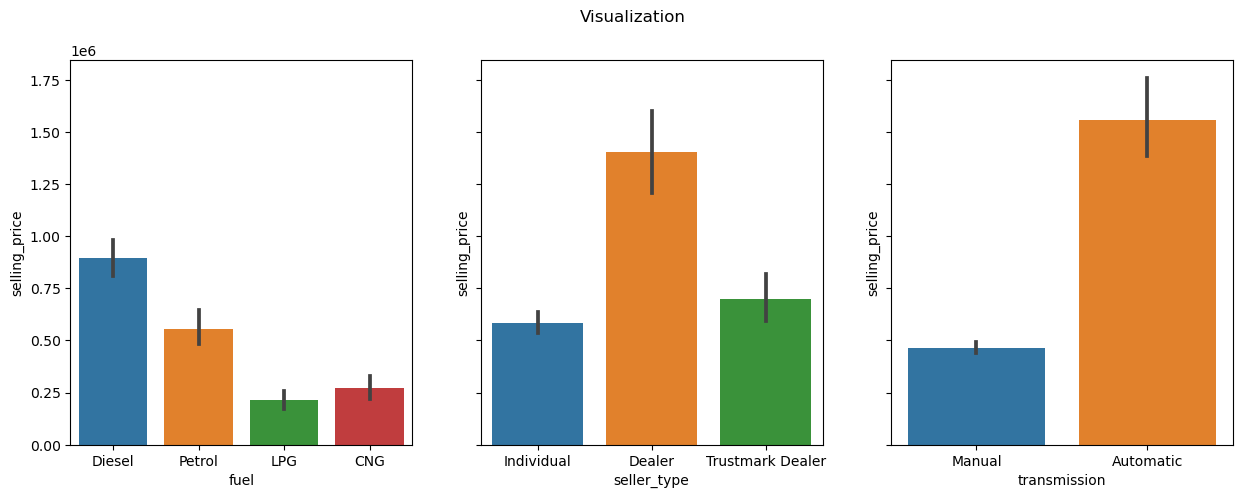

In [43]:
fig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle("Visualization")
sns.barplot(x=fuel,y=selling_price,ax=axes[0])
sns.barplot(x=seller_type,y=selling_price,ax=axes[1])
sns.barplot(x=transmission,y=selling_price,ax=axes[2])

# Observation

Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals

It can be observed that Selling Price would be higher for cars that are Automatic.

Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG

C:\Users\DELL LYF\AppData\Local\Temp\ipykernel_880\1948968213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((car_dataset["year"]))


<Axes: xlabel='year', ylabel='Density'>

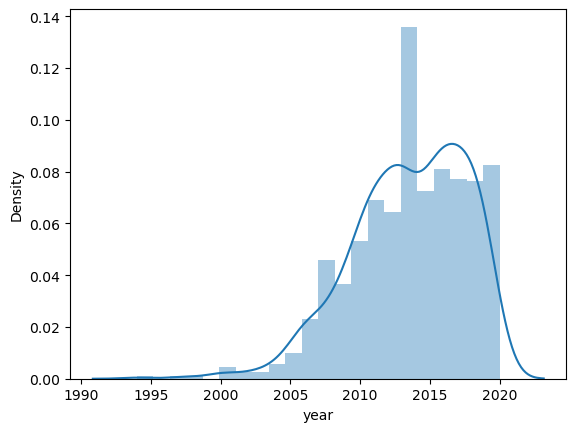

In [44]:
sns.distplot((car_dataset["year"]))

# Observation

In the year of 2010 to 2020 have the high price

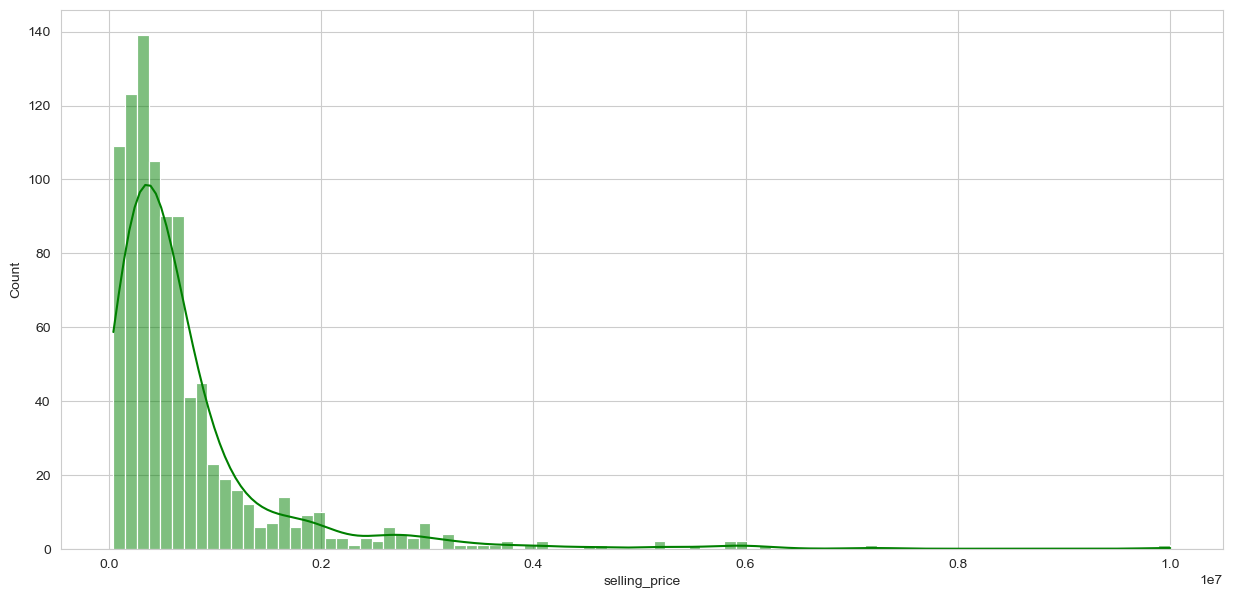

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))
sns.histplot(car_dataset.selling_price,kde=True,color='green')
plt.show()

# Observation


Car count is high in the price of 0.1 to 0.2

C:\Users\DELL LYF\AppData\Local\Temp\ipykernel_880\2061104225.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((car_dataset["km_driven"]))


<Axes: xlabel='km_driven', ylabel='Density'>

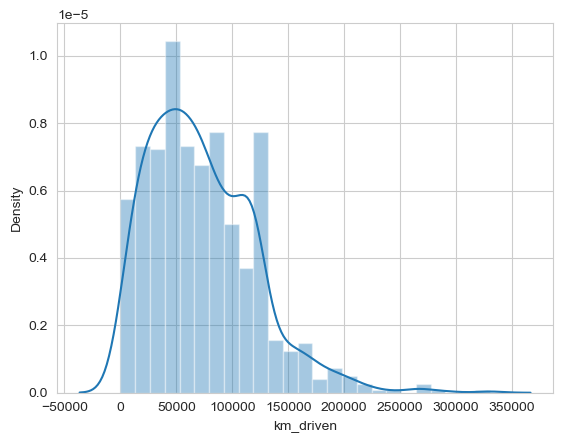

In [46]:
sns.distplot((car_dataset["km_driven"]))

# Observation

50000  km  to  100000  driven cars have the high selling price.

In [47]:
car_dataset['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

# Co-relation plot

In [48]:
#encoding

car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}},inplace=True)
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car_dataset.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,0,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,2,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,0,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,0,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


C:\Users\DELL LYF\AppData\Local\Temp\ipykernel_880\1633798671.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_dataset.corr(),annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

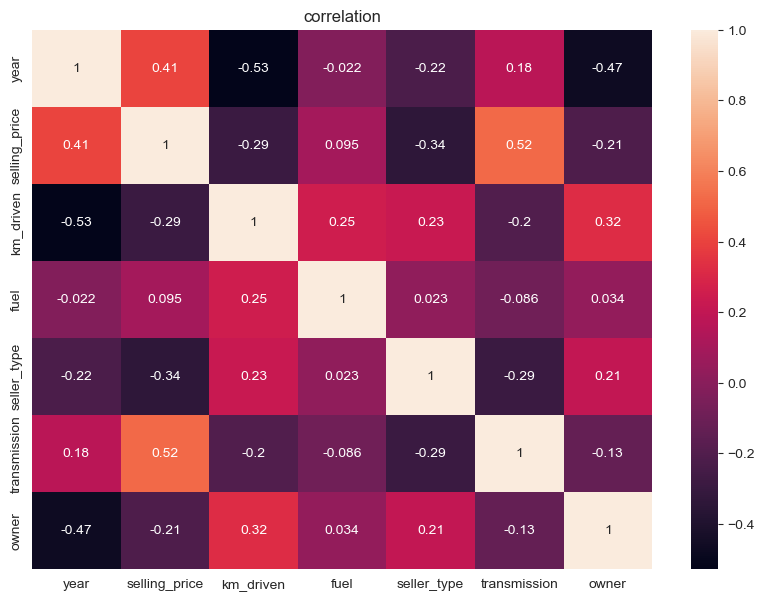

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(car_dataset.corr(),annot=True)
plt.title("correlation")
plt.show

# Test-Train Split

In [50]:
car_dataset['mileage'] = pd.to_numeric(car_dataset['mileage'], errors='coerce')
car_dataset['engine'] = pd.to_numeric(car_dataset['engine'], errors='coerce')
car_dataset['max_power'] = pd.to_numeric(car_dataset['max_power'], errors='coerce')
car_dataset['seats'] = pd.to_numeric(car_dataset['seats'], errors='coerce')

In [51]:
#assigning x,y values
x=car_dataset[['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats']]
y=car_dataset[['selling_price']]

In [52]:
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,1,1,0,0,23.40,1248.0,74.00,5.0
1,2014,120000,1,1,0,1,21.14,1498.0,103.52,5.0
2,2006,140000,0,1,0,2,17.70,1497.0,78.00,5.0
3,2010,127000,1,1,0,0,23.00,1396.0,90.00,5.0
4,2007,120000,0,1,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8045,2017,20171,1,0,1,0,19.87,1461.0,108.50,5.0
8058,2017,8000,0,0,1,0,16.60,1798.0,177.50,5.0
8074,2013,60000,0,1,0,2,16.51,1586.0,103.20,5.0
8081,2005,100000,0,1,1,1,12.00,1493.0,100.00,5.0


In [53]:
y

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8045,750000
8058,1689999
8074,295000
8081,110000


In [55]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=46)

In [56]:
# To check the shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((644, 10), (277, 10), (644, 1), (277, 1))

In [57]:
x_test

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1410,2017,70000,1,1,0,0,16.30,1956.0,170.0,5.0
594,2010,59549,0,0,0,0,19.00,998.0,67.1,5.0
62,2011,110000,0,1,0,2,20.36,1197.0,78.9,5.0
4454,2006,74000,1,1,0,0,13.70,1948.0,68.0,7.0
43,2013,86300,0,0,0,0,16.80,1497.0,116.3,5.0
...,...,...,...,...,...,...,...,...,...,...
2239,2003,83000,0,1,0,1,13.80,1299.0,70.0,5.0
6044,2012,50000,1,1,1,0,16.09,1995.0,184.0,5.0
2418,2017,25000,0,1,0,0,18.12,1196.0,86.8,5.0
155,2016,11000,0,0,1,0,14.30,1598.0,103.5,5.0


In [58]:

y_test

,selling_price
1410,1950000
594,225000
62,190000
4454,130000
43,425000
...,...
2239,110000
6044,1800000
2418,570000
155,645000


In [59]:
 x_train.isnull().sum()

year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         2
engine          2
max_power       2
seats           2
dtype: int64

In [60]:
from sklearn.impute import SimpleImputer
mv=SimpleImputer(missing_values=np.nan,strategy="median")
x_train=mv.fit_transform(x_train)

# Model Building


# Linear Regression
Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.


In [61]:
ln=LinearRegression()

In [62]:
# Training data is used for model building
ln.fit(x_train,y_train)

LinearRegression()

In [63]:
# Testing data is used for prediction
predicted_test=ln.predict(x_test)

C:\Users\DELL LYF\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [64]:
predicted_test

array([[ 1.69117204e+06],
       [ 1.04840377e+05],
       [ 1.15667497e+05],
       [-1.68085058e+05],
       [ 7.95852018e+05],
       [ 2.54222655e+05],
       [ 3.25393390e+04],
       [ 1.83885030e+06],
       [ 3.60751894e+05],
       [ 9.56214328e+05],
       [ 1.03508930e+06],
       [ 2.41046823e+06],
       [ 7.30230612e+05],
       [ 1.15121485e+06],
       [ 3.06347368e+05],
       [ 2.71255237e+05],
       [ 1.64160212e+06],
       [ 1.15504122e+06],
       [ 9.98060566e+05],
       [-1.85955068e+05],
       [ 9.92795650e+05],
       [ 2.56195001e+05],
       [ 1.53792027e+06],
       [ 1.98845851e+06],
       [ 2.73657177e+05],
       [ 2.62083568e+05],
       [ 1.44970555e+05],
       [ 3.95609589e+05],
       [ 5.65490252e+05],
       [ 8.77720268e+05],
       [-2.38436709e+05],
       [ 4.93809602e+05],
       [ 4.56139991e+05],
       [ 6.70536406e+05],
       [ 1.82643381e+06],
       [ 6.92028758e+05],
       [ 5.79155144e+05],
       [ 1.04677776e+06],
       [ 5.0

In [65]:
y_test

,selling_price
1410,1950000
594,225000
62,190000
4454,130000
43,425000
...,...
2239,110000
6044,1800000
2418,570000
155,645000



# accuracy

In [66]:
#importing linbrary for calculating accuracy
from sklearn.metrics import mean_squared_error,r2_score

In [67]:
accuracy=r2_score(y_test,predicted_test)

In [68]:
accuracy

0.6427641217639068


# Decision tree
A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks. It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes. Decision trees are used for classification and regression tasks, providing easy-to-understand models

In [69]:
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,1,1,0,0,23.40,1248.0,74.00,5.0
1,2014,120000,1,1,0,1,21.14,1498.0,103.52,5.0
2,2006,140000,0,1,0,2,17.70,1497.0,78.00,5.0
3,2010,127000,1,1,0,0,23.00,1396.0,90.00,5.0
4,2007,120000,0,1,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8045,2017,20171,1,0,1,0,19.87,1461.0,108.50,5.0
8058,2017,8000,0,0,1,0,16.60,1798.0,177.50,5.0
8074,2013,60000,0,1,0,2,16.51,1586.0,103.20,5.0
8081,2005,100000,0,1,1,1,12.00,1493.0,100.00,5.0


In [70]:
y

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8045,750000
8058,1689999
8074,295000
8081,110000


In [71]:
#importing the library  decisiontreeregressor
from sklearn.tree  import DecisionTreeRegressor

In [72]:
dc=DecisionTreeRegressor()

In [73]:
dc.fit(x_train,y_train)

DecisionTreeRegressor()

In [74]:
prd1=dc.predict(x_test)

C:\Users\DELL LYF\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [75]:
prd1

array([2150000.,  130000.,  300000.,  150000.,  550000.,  400000.,
        110000., 2600000.,  250000.,  675000.,  168000., 2900000.,
        600000.,  960000.,  400000.,  311000., 1250000.,  900000.,
        850000.,  300000.,  775000.,  375000., 1000000., 3000000.,
        320000.,  225000.,  222000.,  550000.,  425000.,  250000.,
         96000.,  400000.,  300000.,  484999., 1630000.,  350000.,
        550000.,  480000.,  300000.,  335000.,  150000.,  200000.,
        725000.,  250000.,  875000.,  170000.,  320000., 1750000.,
        280000.,  259000.,  560000.,  749000.,  420000.,  625000.,
       1250000.,  475000.,  150000.,  900000.,  366000.,  225000.,
        168000.,  500000., 6000000.,  630000.,  550000.,  450000.,
        487000., 2450000.,  650000.,  150000.,  555000., 5850000.,
        960000.,  850000., 2000000.,  320000.,  530000.,   99000.,
        450000.,  335000., 3251000.,  580000.,  850000.,  450000.,
        600000.,  150000.,  400000.,  425000.,  311000.,  3000

In [76]:
accuracy1=r2_score(y_test,prd1)

In [77]:
accuracy1

0.48671727643246643

In [78]:
mean=mean_squared_error(y_test,prd1)

In [79]:
mean

423639760707.6246

# random forest
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [80]:
#importing the library
from sklearn.ensemble import RandomForestRegressor

In [81]:
rd=RandomForestRegressor(n_estimators=40)

In [82]:
rd.fit(x_train,y_train)

C:\Users\DELL LYF\AppData\Local\Temp\ipykernel_880\1577479518.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rd.fit(x_train,y_train)


RandomForestRegressor(n_estimators=40)

In [83]:
prd2=rd.predict(x_test)

C:\Users\DELL LYF\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [84]:
prd2

array([1835874.925,  172875.   ,  248975.   ,  155999.975,  544650.   ,
        391049.4  ,  203074.925, 2414424.95 ,  331199.975,  628400.   ,
        441800.   , 3344950.   ,  578250.   ,  965225.   ,  413300.   ,
        263250.   , 1918175.   ,  837825.   ,  827800.   ,  154899.975,
        708525.   ,  327350.   ,  787500.   , 2583999.95 ,  247050.   ,
        252100.   ,  211075.   ,  385149.875,  451524.9  ,  364050.   ,
        131575.   ,  480124.975,  181275.   ,  643574.825, 1718624.975,
        373599.9  ,  609500.   ,  651750.   ,  210625.   ,  287799.95 ,
        189450.   ,  165749.975,  863000.   ,  345974.95 ,  955775.   ,
        139749.975,  239924.975, 2475499.925,  281800.   ,  271074.975,
        473799.975,  883175.   ,  421374.925,  588874.975, 1180999.975,
        356574.875,  110625.   , 1798149.95 ,  353775.   ,  193825.   ,
        440175.   ,  451674.975, 4975000.   ,  559975.   ,  616275.   ,
        323199.925,  508325.   , 1864249.975,  662650.   ,  1513

In [85]:
#finding the accuracy
accuracy2=r2_score(y_test,prd2)

In [86]:
accuracy2

0.7464569770848715

In [87]:
mean=mean_squared_error(y_test,prd2)

In [88]:
mean

209262655111.9845

# Extra-trees regressor.

This class implements a meta estimator that fits a number of randomized decision trees  on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [89]:
from sklearn.ensemble import  ExtraTreesRegressor

In [90]:
et=ExtraTreesRegressor(n_estimators = 120)
et.fit(x_train,y_train)
prd3=et.predict(x_test)

C:\Users\DELL LYF\AppData\Local\Temp\ipykernel_880\3615405687.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(x_train,y_train)
C:\Users\DELL LYF\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [91]:
prd3


array([1618000.        ,  181000.        ,  239883.33333333,
        143325.        ,  506249.975     ,  376107.65833333,
        186908.33333333, 1507874.95      ,  345558.33333333,
        689916.66666667,  379166.66666667, 3261966.66666667,
        536024.95833333,  988316.65833333,  475058.33333333,
        262908.33333333, 1706074.96666667,  818716.66666667,
        864483.33333333,  189774.98333333,  734208.33333333,
        316891.65833333,  953391.66666667, 2699424.99166667,
        207425.        ,  262291.65833333,  194891.66666667,
        356333.3       ,  430208.25833333,  371683.33333333,
        138875.        ,  456624.98333333,  268033.33333333,
        598716.425     , 3889316.66666667,  427466.65833333,
        517608.33333333,  554150.        ,  212008.31666667,
        289583.26666667,  198116.65833333,  154408.33333333,
        963525.        ,  382899.98333333,  966141.66666667,
        138158.33333333,  198349.98333333, 2777516.66666667,
        883108.33333333,

In [92]:
#finding the accuracy
accuracy3=r2_score(y_test,prd3)

In [93]:
accuracy3

0.837321696932815

# XGBRegressor
The XGBRegressor in Python is the regression-specific implementation of XGBoost and is used for regression problems where the intent is to predict continuous numerical values. objective is a required parameter representing the objective function to use for regression.

In [94]:
from xgboost import XGBRegressor

In [95]:
xgb=XGBRegressor(n_estimators = 120)
xgb.fit(x_train,y_train)
prd4=xgb.predict(x_test)

In [96]:
prd4

array([1993172.9  ,  220853.48 ,  209163.92 ,  115335.98 ,  476409.3  ,
        430438.84 ,  210331.02 , 1421986.1  ,  291716.94 ,  587050.9  ,
        702729.6  , 4285466.5  ,  493905.5  , 1091032.8  ,  468641.62 ,
        218310.08 , 1162632.2  ,  829885.5  ,  784007.6  ,  117733.36 ,
        576893.8  ,  351236.38 ,  622208.7  , 2544455.   ,  220250.83 ,
        226107.19 ,  206885.14 ,  367845.03 ,  400904.28 ,  249087.8  ,
        130957.07 ,  426481.06 ,  210486.66 ,  677371.   , 2447198.   ,
        403609.9  ,  536863.75 ,  670865.4  ,  477434.62 ,  210916.84 ,
        219832.36 ,  187315.47 ,  846008.8  ,  225641.05 ,  916225.8  ,
        149539.27 ,  226634.4  , 2417544.8  ,  605953.25 ,  217099.03 ,
        446601.3  , 1047803.94 ,  383270.88 ,  610771.5  , 1120730.   ,
        466600.34 ,   97898.48 , 2563223.2  ,  340289.9  ,  170790.6  ,
        795653.75 ,  444010.28 , 2733026.8  ,  613313.25 ,  626048.3  ,
        394866.66 ,  560823.75 , 2019359.4  ,  513746.9  ,  1568

In [97]:
#finding the accuracy
accuracy4=r2_score(y_test,prd4)

In [98]:
accuracy4

0.8507412622553809

In [99]:
results = pd.DataFrame({
    'Model': [ 'Linear Regression',
              'Random Forest Regressor',
              'ExtraTree Regressor',
              'Decision Tree Regressor',
              'XGBRegressor'
              ],
    'Score': [accuracy,
             accuracy1,
             accuracy2,
             accuracy3,
             accuracy4]
           })

In [100]:
results

,Model,Score
0,Linear Regression,0.642764
1,Random Forest Regressor,0.486717
2,ExtraTree Regressor,0.746457
3,Decision Tree Regressor,0.837322
4,XGBRegressor,0.850741


In [101]:
import numpy as np

In [102]:
new_data = np.array([2007,120000,0,1,0,0,16.10,1298.0,88.20,5.0 ])
std = StandardScaler()
std.fit(x_train)

data_reshape = new_data.reshape(1, -1)
std_input = std.transform(data_reshape)

regression_model = XGBRegressor()
regression_model.fit(x_train, y_train)

predicted_price = regression_model.predict(std_input)

print(predicted_price)

[108248.15]


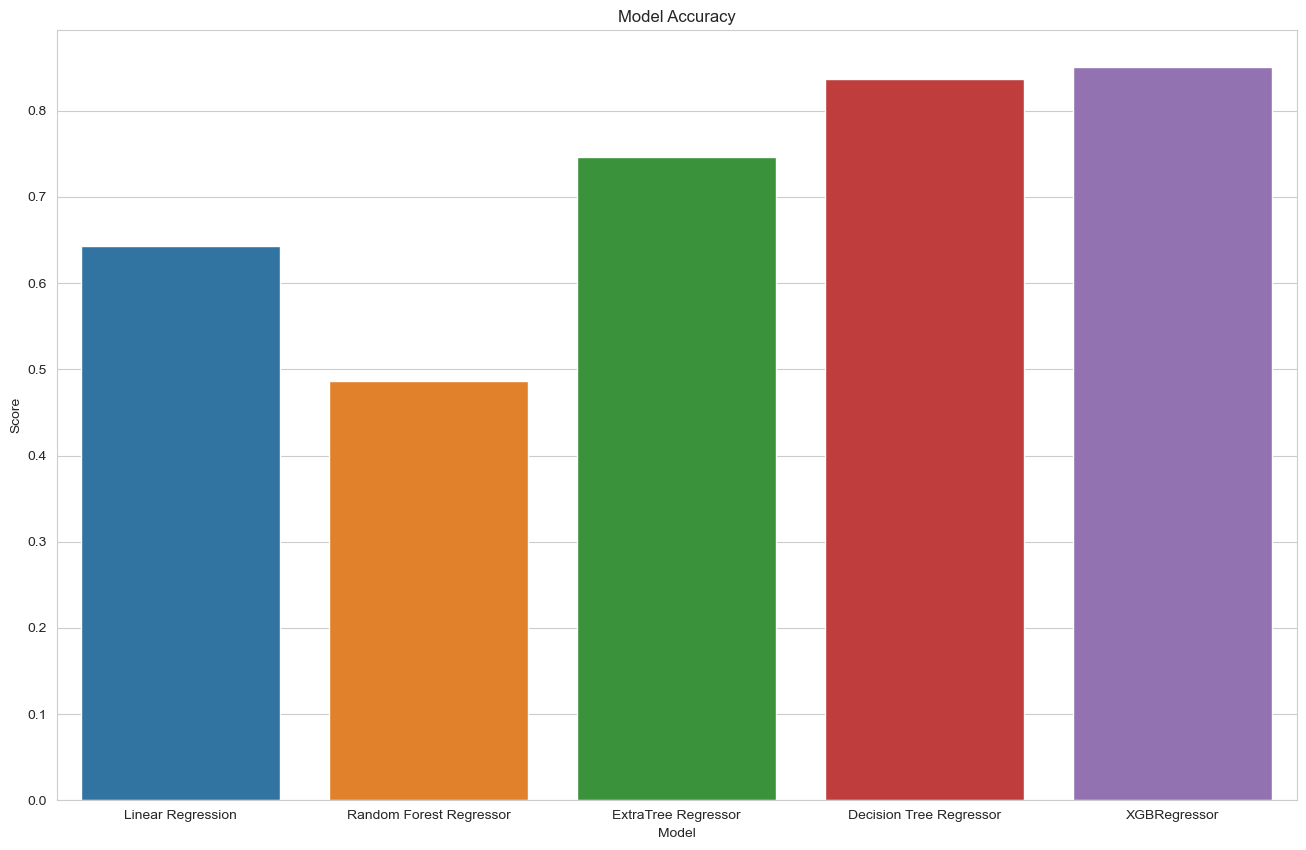

In [103]:
plt.figure(figsize=(16,10))
sns.barplot(x='Model' ,y='Score',data=results)
plt.title('Model Accuracy')
plt.show()

# Observation

Here we can see that our XGBRegressor model only have the High Accuracy score


# Conclusion
The increased prices of new cars and the financial incapability of the customers to buy them, Used Car sales are on a global increase. Therefore, there is  need for a Used Car Price Prediction system which effectively determines the worthiness of the car using a variety of features.Here we Successfully create a Machine learning Based Car price Prediction System.
